# PRINCIPAL COMPONENT ANALYSIS

## Question

A 2-dimensional zero-mean data set of N=30 normal data points are generated from a 2D Gaussian distribution x~N(0_2, C), where the co-variance matrix C=[[10.5 13][13   30]] The data set is corrupted by four outlying points o_1=[18 -22)],o_2=[20  -20],o_3=[21 -20],o_4=[24 -15]. 

4.a Generate a 2D plot to show the normal data points, outlying data points, the true rank-1 principal direction of the normal data points, the rank-1 principal direction found by L2-PCA, and the rank-1 principal direction found by L1-PCA. To calculate L1 principal componente, you can use the Matlab code l1pca_SBFK.m provided in the Term Project module on Camino.


## IMPORTS

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

import random

zero-mean data

In [2]:
mean = [0,0]

Covariance Matrix

In [3]:
cov = [[10.5,13],[13,30]]

In [4]:
cov = np.array(cov)

 Eigen Value Decompostion of Covariance Matrix to compute Nominal maximum-variance direction

In [5]:
w, v = LA.eig(cov)

Genrating X-axis values and Y-axis values for Nominal maximum-variance direction

In [6]:
slope = v[1][1]/v[0][1]
x = np.arange(-25,25,0.01)
y = x*slope

 Gerating Radom 30 data points from the given coviariance matrix

In [7]:
z = np.random.multivariate_normal(mean, cov, 30)
plt_x , plt_y = z.T

Outliers

In [8]:
a = []
a.append([18,-22])
a.append([20,-20])
a.append([21,-20])
a.append([24,-15])

a = np.array(a)
outlier_x,outlier_y = a.T

Adding outliers to our original data set

In [9]:
z = np.concatenate((z,a))
data_x, data_y = z.T

Function to calculate L1 - PCA

In [26]:
def l1pca_SBF_rank1_simplified(X,L):
    N = len(X[0]) #Number of data points
    max_iter = 1000 #Number of iteration    
    delta = [0] * N #array to store quadratic value
    obj_val = 0 #initialize the objective function's value ||X*b||_2^2
    
    for i in range(0,L): #loop through initializations
        b = []
        for j in range(0,N): #random initalization of the b vector
            temp = 0
            while temp == 0:
                temp = random.randint(-1,1)
            b.append(temp)
        b = np.array(b)
        #b = np.random.choice([0, 1], size=(N,), p=[1./3, 2./3])* 2 - 1;
        flag = True
        for j in range(0,max_iter): #loop of iterations for bit flipping
            
            for k in range(0,N): #loop over N bits in b
                bk = np.delete(b,k,0) #remove the i-th bit
                Xk = np.delete(X,k,1) #remove the i-th data sample
                if flag:
                    print(Xk,bk)
                    print(np.matmul(Xk,bk))
                    print(b[k]*X.T[k].T)
                    print(np.matmul((b[k]*X.T[k].T),np.matmul(Xk,bk)))
                    flag = False
                delta[k] = -4 * np.matmul((b[k]*X.T[k].T),np.matmul(Xk,bk)) #calculate the "increase of the objective function" after flipping the i-th bit
                X.transpose()
            ID = sorted(range(len(delta)), key=lambda g: delta[g],reverse = True) #sort delta and find the bit that leads to the highest increase
            #delta.sort(reverse = True)
            val = np.sort(delta)[::-1]
            
            if val[0] > 0: #if the highest "increase" is positive
                b[ID[0]] = -b[ID[0]] #then flip the corresponding bit in b
            else:
                break #otherwise, SBF terminates
        tmp = LA.norm(np.matmul(X,b)) #calculate the  objective function's value
        if tmp > obj_val: #if larger than the old obj function value
            obj_val = tmp
            bopt = b #then update the obj function value, and the optimal b
            l_best = i
    Qprop = np.true_divide(np.matmul(X,bopt),LA.norm(np.matmul(X,bopt))) #PCA X*bopt/norm(X*bopt)
    Bprop = bopt
    return Qprop,Bprop,l_best

Calling L1-PCA

In [27]:
Qprop,Bprop,l_best = l1pca_SBF_rank1_simplified(z.T,1)

[[  0.24807676   8.08881672  -1.41552681   1.27923243  -1.1827153
    1.71710608  -0.6586719    1.26642217   0.99372873  -3.7798583
   -2.81694015   8.34574909   1.84652849   0.47145675   3.90333179
   -2.92013324  -1.01471914  -2.03381952  -4.39267422  -2.61770797
   -2.29529858   2.23458114   4.74747149   9.22850407   1.80097426
    1.92835975   3.01676143   0.87106443  -1.33042685  18.
   20.          21.          24.        ]
 [ -1.70235674   6.93388483   2.05957987   2.59910992  -0.72219456
    8.31124978  -5.03547958  -0.0740509    5.69938512  -4.77016617
   -8.8536904   12.42609065   1.78039682  -2.58318557  14.87584934
   -2.56718631   2.04066091   0.62621454  -5.65862861  -6.20882338
   -7.03820575  -2.02466445   6.35055398  15.37054872   0.6962978
    5.48861753   0.43740157   1.22209525  -6.44834298 -22.
  -20.         -20.         -15.        ]] [-1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1  1  1 -1  1  1  1  1 -1]
[ 19.68124928 -52.2583856 ]


In [28]:
Qprop

array([ 0.09843425, -0.99514356])

Genrating X-axis values and Y-axis values for L1 - PCA

In [13]:
slope = Qprop[1]/Qprop[0]
x_l1 = np.arange(-25,25,0.01)
y_l1 = x_l1 * slope

Calculating L2-PCA by Singular Value Decompostion

In [14]:
u, s, vh = np.linalg.svd(z)

Genrating X-axis values and Y-axis values for L2 - PCA

In [15]:
slope = vh[0][1]/vh[0][0]
x_l2 = np.arange(-25,25,0.01)
y_l2 = x_l2 * slope

Genrating X-axis values and Y-axis values

In [16]:
x_axis = np.arange(-25,25,0.01)
y_x_axis = x_axis*0
y_axis = np.arange(-25,25,0.01)
x_y_axis = y_axis*0

# PLOT

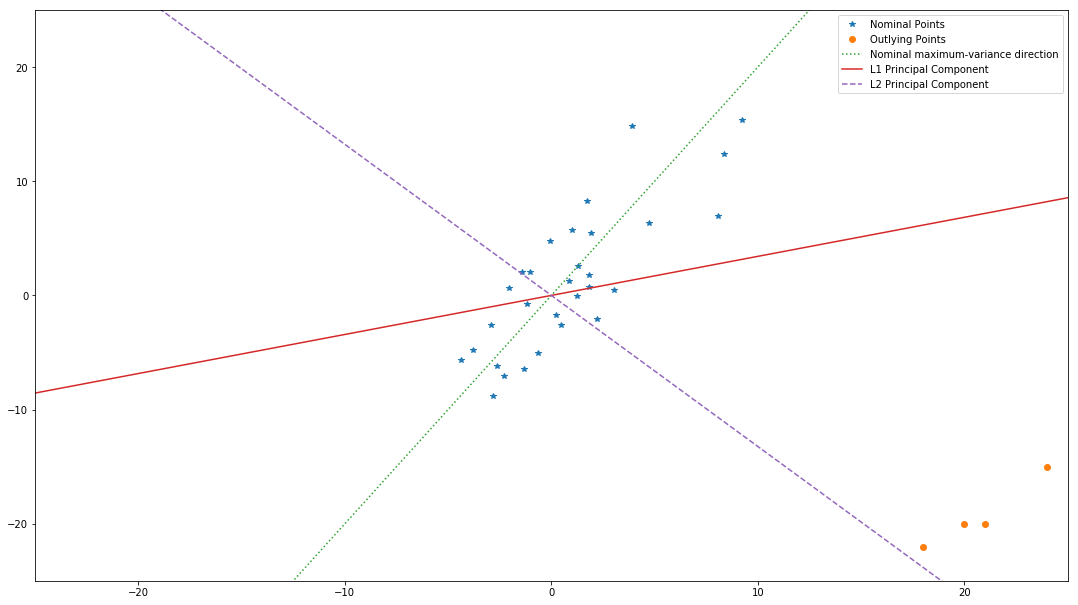

In [17]:
%matplotlib inline
plt.plot(plt_x,plt_y,'*') #original data points
plt.plot(outlier_x,outlier_y,'o') #outliers
plt.plot(x,y,':') #Nominal mamimum-variance direction
plt.plot(x_l1,y_l1) #L1 Principal Component
plt.plot(x_l2,y_l2,'--') #L2 Principal Component
#plt.plot(x_axis,y_x_axis) #X-axis
#plt.plot(x_y_axis,y_axis) #Y-axis
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.legend(('Nominal Points','Outlying Points','Nominal maximum-variance direction','L1 Principal Component','L2 Principal Component'))
plt.show()